### <p style="text-align: right;"> &#9989; Jake Volek</p>

# Homework Assignment #2 (Individual)
## Pandas Review and Writing Python Classes

<img src="https://files.realpython.com/media/Object-Oriented-Programming-OOP-in-Python-3_Watermarked.0d29780806d5.jpg" width=400px align="right" style="margin-left: 20px" alt="Image credit: www.noao.edu">

### Goals for this homework assignment
By the end of this assignment, you should be able to:
* Use Git to create a repository, track changes to the files within the repository, and push those changes to a remote repository.
* Use your Pandas skills to load and explore some data and visualize it with matplotlib
* Read and write Python classes, including classes that leverage object inheritance
* Refactor functional programming into object oriented programming

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **65 points** possible on this assignment. Point values for each part are included in the section headers and question prompts.

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, February 26.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2.  Submission instructions can be found at the end of the notebook.

---
## Part 1: Add to your Git repository to track your progress on your assignment (3 points)

For this assignment, you're going to add it to the `cmse202-s21-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s21-turnin` repository and create a new directory called `hw-02`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Make sure you've added your Professor and your TA as collaborators to your "turnin" respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s21-turnin`" repository inside the `hw-02` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

**Do this**: Before you move on, put the command that your instructor should run to clone your repository in the empty cell below.

In [ ]:
# Put the command for cloning your repository here!
!git clone https://github.com/volekjac/cmse202-s21-turnin/blob/main/hw-02/HW-02_PandasReviewAndPythonObjects-JakeVolek.ipynb

---
## Part 2: Load, manipulate, and visualize data with Pandas (28 points)

For this part of the assignment, you're going to brush off your Pandas skills and your data manipulation and visualization skills. Throughout the course we'll continue to work with data, so this should be a good opportunity to remind yourself of some tool and techniques you picked up in CMSE 201 or perhaps learn something new.

You're going to analyze a subset of the data was that used for this article:

**[How A Booming Population And Climate Change Made California’s Wildfires Worse Than Ever](https://www.buzzfeednews.com/article/peteraldhous/california-wildfires-people-climate)**

The data originally came from [here](https://www.fs.usda.gov/rds/archive/) and although the article is about fires in California, the original data contained information for _all_ states.

The columns in the data correspond to the following:

* Column 1: Object ID
* Column 2: Fire Year
* Column 3: Discovery Day of Year (i.e. what day of the year out of the 365 days in a year)
* Column 4: Fire size (in number of acres contained by the perimeter of the fire)
* Column 5: Latitude
* Column 6: Longitude

&#9989; **Question 1 (3 points)**: Read in all of the columns from the `fires.csv` dataset **using Pandas**. The file can be downloaded from here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/data/fires.csv`

Remember, CSV stands for "comma-separated values".

**To confirm that everything went as intended, print out the length of the "objectid" column to determine how many data points are in the dataset and print the maximum and minimum of the "fire_year" information**. You should find that you have 1755 values with fires that happened from 2011 to 2015.

*Remember*, the dataset needs to be in the same location as this notebook for you to be able to read it in.

In [13]:
#Import panda, download, and read the csv file.
import pandas as pd
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/data/fires.csv
fires = pd.read_csv("fires.csv")


#Print the length of the list and the maximum value
print(len(fires['objectid']))
print(max(fires['fire_year']))


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77422  100 77422    0     0  1575k      0 --:--:-- --:--:-- --:--:-- 1575k
1755
2015


&#9989; **Question 2 (5 points)**: **Where did these fires happen?** Make a plot of **latitude** vs **longtiude** and **ensure that it contains useful axis labels and a title**. Make sure that plot conveys meaningful information (i.e. not just a bunch of crazy lines!). Remember, **latitude values run north to south** and **longitude values run east to west** so make sure you put the appropriate values on the appropriate axis.

Can you identify which state these fires occurred in? *Hint*: It's _not_ California. *Second hint*: If it's not immediately obvious to you, examine some of the longitude and latitude values and look them up on [Google Maps](http://maps.google.com).

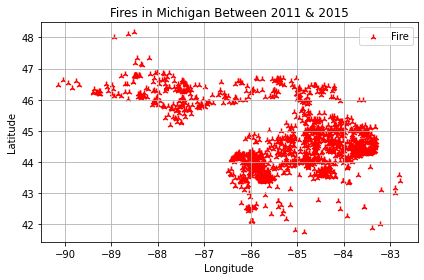

In [14]:
#Import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

#Create a scatter plot of the fires
plt.scatter(fires['longitude'], fires['latitude'], color = 'red', marker = '2', label = 'Fire')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Fires in Michigan Between 2011 & 2015")
plt.grid()
plt.tight_layout()
plt.legend()

These fires happen in Michigan. You can vaguely see the shape of the upper peninsula and the top of the lower peninsula in my chart above.

&#9989; **Question 3 (6 points)**: **Exploring fire sizes.** For this part, you're going to perform some data analysis to learn a bit about the sizes of the fires contains in the dataset.

Calculate and print the following (there's more than one way to do this, both "by hand" and using built-in Pandas functionality):

1. The minimum fire size
2. The maximum fire size
3. The mean (average) of the fire sizes
4. The median (the middle or "typical" value) of the fire sizes

After you compute these values, **comment on what this tells you about the distribution of fire sizes in the data in the markdown cell below**. Are there more small fires or more large fires? Explain your answer.

In [15]:
#Print the desired statistics from fires
print(min(fires['fire_size']))
print(max(fires['fire_size']))
print(sum(fires['fire_size']) / len(fires['fire_size']))
print(fires['fire_size'].median())
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html This source
#helped me find the median of a column in a pandas dataframe


0.01
21069.0
18.450837606837343
0.5


This tells us the data is very skewed right because the mean is much higher than the median. We can see the maxium value is very large.

&#9989; **Question 4 (6 points)**: **Filtering the data by masking out large values.** Now that you have a bit of a sense for the range of fire sizes in the data, you're going to filter the data to look only at the smaller fires. To accomplish this, do the follow:

1. Create a mask that selects only the fires in the dataset that are ***less than or equal to 5 acres***.
2. Once you have that mask, use it to compute what fraction of all fires meet this condition and print that fraction.
3. Then, make a histogram of the fires that meet this condition. Use **15 bins** in your histogram and make sure to put axis labels on your plot.

**Does the resulting histogram agree with your conclusions from your simple statistical analysis?** 

[If you cannot figure out how to do this using a mask, find the fires that meet this criteria using any method that you can come up with to receive partial credit.]

Percent of fires less than or equal to 5 acres: 0.8883190883190883


Text(0, 0.5, 'Count')

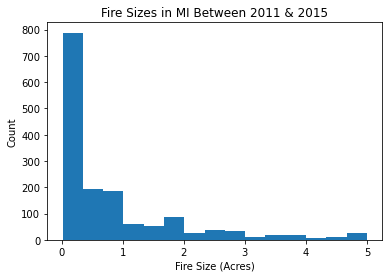

In [17]:
#Filter the data to be fires less than 5 and create a histogram of the data 
small_fires = fires[fires['fire_size'] <= 5]
print("Percent of fires less than or equal to 5 acres:", len(small_fires) / len(fires))
plt.hist(small_fires['fire_size'], bins = 15)
plt.title("Fire Sizes in MI Between 2011 & 2015")
plt.xlabel("Fire Size (Acres)")
plt.ylabel("Count")

Yes, we can see in the histogram that majority of fires are less than one acre. Our average size was 18 acres because the average was affected by the maximum fire and others than were close to the maximum. Since this distribution of fires is very skewed to the right, our median of 0.5 does a better job of summarizing the data than the mean.

&#9989; **Question 5 (8 points)**: **Where are most of the fires happening?** Now that you have a sense for where the fires are happening and how big they are, the last thing you're going to do is try to figure out where the fires most often occur.

To do this, you're going to use a potentially new-to-you function, `plt.hexbin()`. This function will create a "heat map" (pardon the pun!) of where the fires are most often occurring.

You should use your longitude and latitude values for **_all_** of the fires as your inputs to `plt.hexbin()`. You should also set the `gridsize` to `50`, the `bins` to `'log'`, and the colormap to `'inferno'` (because fire!). **Make sure you label your plot axes and add a labeled colorbar to the plot.**

For reference, the documentation for `plt.hexbin()` can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html).

Examples of what a hexbin plot looks like can be found [here](https://matplotlib.org/2.0.2/examples/pylab_examples/hexbin_demo.html).

Based on your results, **which forest (could be a state forest or a national forest) seems to be having the most fires?** Put your answer in the markdown cell below and justify your conclusion. You might need to consult an actual map to figure this out!

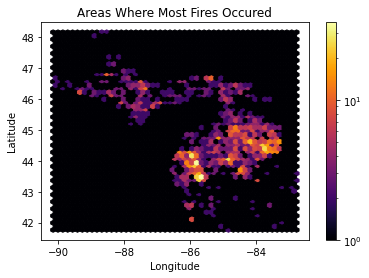

In [18]:
#Create a hexbin graph of the data and where they were
plt.hexbin(fires['longitude'], fires['latitude'], gridsize = 50, bins = 'log', cmap = 'inferno')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Areas Where Most Fires Occured")
plt.colorbar()

We see a lot of fires in the lower peninusla along the west and east sides of the state. The west coast appears near the Grass Lake State Forest Campgrounds and the east side looks to be near Van Etten Lake State Forest.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 2", and push the changes to GitHub.

---

## Part 3: Writing a simple Python class (22 points)

### 3.1 Enhancing and using a pre-existing class (14 points)

For this section, you're going to expand on the pre-existing Python class contained in a file called `Student.py`. You'll need to download this script and put it in the same location as this notebook. **You should also add it and commit it to your repository in the same `hw-02` folder**. You can download the file from here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/code_samples/Student.py`

The Python class contrained in this script is called `Student` and, not surprisingly, it is designed to store information about an individual student and currently just includes one simple method, one that prints the student's name.

**&#9989; Question 6 (14 points); Do This (make sure to read _everything_ carefully):** Using this class as a starting point, your goal is to do the following:

* Add a new attribute, `year`, to the class so that it is defined when the class object is first initialized. This attribute will represent how many years the student has been in college. 
* Add a new class method, `enroll`, that takes as input a list of courses and adds them as an attribute to the student
* Add a new class method, `display_courses`, that prints out: <br>
"I am enrolled in: < courses >" <br>
where the < courses > part is filled in with the courses that are added by the `enroll` method.
* Add a new class method, `years_until_graduation`, that **returns** the number of years left until the student graduates (assuming that a student typically graduates after 4 years)

You should then **import your new `Student` class from the script so that you can create student objects in your notebook**. 

Then, do the folowing:
* using the `roster` provided below, **create a list of `Student` objects that contain the information for each student.**
* using your list of students, **randomly enroll each of them in two of these three classes: 'CMSE 202', 'ISP 205', or 'HB 409'.** You should enroll the students using your `enroll` method.
* Once you've enrolled all of your students, **use your student list to print the following for every student**:

>My name is < name > <br>
I am enrolled in < courses > <br>
I will graduate in < years until graduation > years.

where the appropriate student information is filled in for each part indicated by the < >'s

* Finally, **print the average GPA for this list of students**.

**Note**: you should also practice writing docstrings in your class script so that it is clear what your methods are doing!

In [ ]:
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/code_samples/Student.py

In [20]:
# This is your roster of students (ignore the fact that apparently dogs can enroll in college courses)
# The information provided is: name, GPA, years in college
roster = [['Fred', 2.0, 4],
          ['Velma', 3.5, 2],
          ['Daphne', 3.0, 3],
          ['Shaggy', 2.5, 2],
          ['Scooby', 3.5, 3],
          ['Scrappy', 4.0, 1]]

In [21]:
#Import the student class from Student.py and random
from Student import Student
import random

#Initialize a list of students and the potential classes
students = []
classes = ['CMSE 202', 'ISP 205', 'HB 409']

#For each student in our roster create an object for that person and add it to our students lis
for student in roster:
    stu_obj = Student(student[0], student[1], student[2])
    students.append(stu_obj)
#Enroll the students in our list into two classes from potential classes
for obj in students:
    obj.enroll(random.sample(classes, k = 2))

#For each student print the desired information
for person in students:
    person.get_name()
    person.display_courses()
    years_left = person.years_until_graduation()
    print("I will graduate in", years_left, "years.")


My name is Fred
I am enrolled in CMSE 202, ISP 205
I will graduate in 0 years.
My name is Velma
I am enrolled in CMSE 202, HB 409
I will graduate in 2 years.
My name is Daphne
I am enrolled in HB 409, CMSE 202
I will graduate in 1 years.
My name is Shaggy
I am enrolled in HB 409, CMSE 202
I will graduate in 2 years.
My name is Scooby
I am enrolled in HB 409, CMSE 202
I will graduate in 1 years.
My name is Scrappy
I am enrolled in ISP 205, HB 409
I will graduate in 3 years.


### 3.2 Inheriting your new class (8 points)

**&#9989; Question 7 (8 points)**: Now that you have a functioning class, your next task is to create a second class, `Spartan`, that **inherits** the `Student` class. **You should create this new class in the same `Student.py` script. When you're done, there should be two different classes available to be imported from the script: `Student` and `Spartan`.**

In this new `Spartan` class, do the following:

* add a new class method, `set_motto`, that takes a string as an input  and uses it to set a new class attribute, `motto`.
* add a second new class method, `school_spirit`, that prints:

>My name is < name > <br>
I am a Spartan. My motto is < motto >"

where < name > and < motto > use the appropriate attribute values from your object.

Finally, **import your new Spartan class and create a version of yourself by initializing a new `Spartan` object with your own information. Set your motto to be "Advancing Knowledge. Transforming Lives." and test out your `school_spirit` method.**

**IMPORTANT NOTE**: Once you've written your new Spartan class, you'll need to restart your notebook kernel before you try to import the new `Spartan` class. By default, the Jupyter notebook doesn't re-import old packages/scripts once its done so the first time, but if you restart the notebook kernel, it should find your new `Spartan` class.

In [1]:
#Import the spartan class
from Student import Spartan
#Create an object for my information and run the school_spirit method.
me = Spartan("Jake")
me.set_motto("Advancing Knowledge. Transforming Lives.")
me.school_spirit()

My name is Jake
I am a Spartan. My motto is Advancing Knowledge. Transforming Lives.


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing part 3", and push the changes to GitHub. **Make sure you've added your version of `Student.py` to your repository!**

---

## Part 4: Transforming your code from functional programming to object-oriented programming (12 points)

For this part of the assignment, **you're going to take the code your wrote in Part 3.5 of Homework #1 and convert it to an object oriented approach** rather than the functional programming approach you used previously. If you didn't manage to complete Section 3.5 in the previous assignment or you still had some bugs to work out, this will be your chance to build off of whatever you did manage to get working. Using and reusing code you've built previously is a useful computatonal skill!

**&#9989; Question 8 (8 points)**: Using your code from the previous homework assignment and your newfound ability to load, manipulate, and visualize FITS files, you're going to work on building a new Python class that performs the same image manipulation.

To get started, you need to first download another script that has the initial framework for the new class that you're going to finish building. The file is called `Observer.py` and it can be downloaded from here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/code_samples/Observer.py`

**You should also add it and commit it to your repository in the same `hw-02` folder**.

The new class in this script is called `Observer` and the main purpose of this class is to "observe" the night sky using images that have been stored as FITS file. This `Observer` should also be capable of computing simple statistics about the images it is observing and make composite images of what it observes.

Using the initial framework provided in `Observer.py`, your task is to:

1. Finish the `load_images` method so that it takes two image filenames as inputs, loads the FITS files, and stores the image array data as *attributes* of the Observer class.
2. Define a new method called `calc_stats` for the Observer class that prints the mean and standard deviation of both images. Make sure that the print statements indicate which image the values correspond to by using the filename attributes that are stored when the Observer is initialized.
3. Finish the `make_composite` method so that it creates a 3D NumPy array that represents a 2D image and it's corresponding RGB values. As a reminder, the Red, Green, and Blue channels should be defined in the following ways:
    1. The red channel should be defined as $$ 1.5 \times \frac{\mathrm{I~filter~image~array}}{\mathrm{The~maximum~of~the~R~filter~image~array}}$$
    2. The green channel should be based on the average pixels values, speficially defined as $$ \frac{\mathrm{(I~filter~image~array + R~filter~image~array)/2}}{\mathrm{The~maximum~of~the~R~filter~image~array}}$$
    3. The blue channel should be defined as $$ \frac{\mathrm{R~filter~image~array}}{\mathrm{The~maximum~of~the~R~filter~image~array}}$$
    
    **The code for creating the red channel has been provided for you!**
    
    For this method, you may run into issues with some of your image data values not being of the correct type to do the some of math necessary to make the composite image, so you may need to convert some of the values to the appropriate type. Also, make sure you understand what the code is doing, especially when it comes to "clipping" the RGB values!
    
    When this function is called it should **display the "false color" image you've created by using `plt.imshow()`** 
    
**IMPORTANT NOTES**: You should be able to re-use much, if not all, of your code from last time, but you will have to **[refactor](https://en.wikipedia.org/wiki/Code_refactoring)** it a bit to make sure it uses the correct syntax for the class. In particular, you will need to make sure you make use of `self` in the right locations within the class. Also, once your call the `load_images` function, your Observer object should have all of the information it needs for the `calc_stats` method and the `make_composite` method stored in the object attributes. Neither of those functions should need any additional input paramters.

In [2]:
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/code_samples/Observer.py
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1635  100  1635    0     0  10756      0 --:--:-- --:--:-- --:--:-- 10756


**&#9989; Question 9 (4 points):** Now that you've defined all of the methods for the `Observer` class, you're going to put them to use.

In the following cell:
1. Import the `Observer` class from the script.
1. Create a new Observer object and provide it with the two file names for the two images (R filter **first** and I filter **second**).
2. Use your new Observer object to call the `calc_stats` method.
3. Use your new Observer object to call the `make_composite` method.

As a reminder, if all goes well, you should end up with a composite image that looks something like this:

<div align="center"><img src="https://i.ibb.co/X2mK6qN/m42-falsecolor-final.png" alt="m42-falsecolor-final" border="0"></div>

**Important note:** It is not required that your final composite image has the Right Ascension and Declination coordinates, but if you figured out how to do this in Part 5, I encourage you to include it!

If you need the data files again, you can get them here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/data/m42_40min_ir.fits`

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/data/m42_40min_red.fits`

In [3]:
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/data/m42_40min_ir.fits
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S21-student/master/data/m42_40min_red.fits

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.8M  100 10.8M    0     0  31.6M      0 --:--:-- --:--:-- --:--:-- 31.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.8M  100 10.8M    0     0  53.4M      0 --:--:-- --:--:-- --:--:-- 53.4M


m42_40min_ir.fits
Mean: 7709.482913447791
Standard Deviation: 4964.552130811538
m42_40min_red.fits
Mean: 14795.749599452456
Standard Deviation: 4558.575366278035


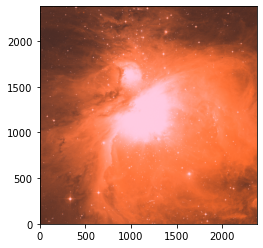

In [9]:
# The magic commands below tells Jupyter Notebook to automatically load classes and methods from external files 
# in case they have changed from last load time;
# This is useful in case you're editing and trying to debug your script and you should leave them here.
%reload_ext autoreload
%autoreload 2

# Import the Observer class
from Observer import Observer

#Create an object for my image with the given files and run the calc_stats and make_composite methods on that object.
my_image = Observer('m42_40min_ir.fits', 'm42_40min_red.fits')
my_image.calc_stats()
my_image.make_composite()

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing part 4", and push the changes to GitHub. **Make sure you've added your version of `Observer.py` to your repository! But _DO NOT_ add the data files!!!**

---

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [11]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofddd5T-Pwn1DlT6_yoCyuCFURVIyS0ZRWTgzRUFOOE1GWDZURUZFS1VBSy4u" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #2, and upload it there.

&#169; Copyright 2020,  Department of Computational Mathematics, Science and Engineering at Michigan State University